**Resume Classification**


In [1]:
!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!sudo apt-get install antiword
!pip install python-docx
!pip install xgboost
!pip install wordcloud
!python -m spacy download en_core_web_sm
!pip install nltk
!pip3 install nltk 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 39.7 MB 1.1 MB/s 
     |████████████████████████████████| 2.7 MB 31.4 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 121 kB 73.6 MB/s 
     |████████████████████████████████| 90 kB 5.5 MB/s 
     |████████████████████████████████| 100 kB 11.0 MB/s 
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 1.8.6
    Uninstalling Sphinx-1.8.6:
      Successfully uninstalled Sphinx-1.8.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=51773f84ee548f201ed05e6c6b1e32cff490d38b16e0376ed71aef1acb2ac0af
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.3 MB/s 
     |████████████████████████████████| 69 kB 7.9 MB/s 
     |████████████████████████████████| 106 kB 68.1 MB/s 
     |████████████████████████████████| 5.6 MB 7.4 MB/s 
     |████████████████████████████████| 32.8 MB 63 kB/s 
     |████████████████████████████████| 103 kB 58.7 MB/s 
     |████████████████████████████████| 2.3 MB 51.7 MB/s 
     |████████████████████████████████| 128 kB 57.5 MB/s 
     |████████████████████████████████| 112 kB 59.4 MB/s

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 128 kB of archives.
After this operation, 633 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 antiword amd64 0.37-11build1 [128 kB]
Fetched 128 kB in 1s (245 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-pre

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Importing Libraries**

In [3]:
import os,re
import pandas as pd
import numpy as np
import docx2txt
import textract
from docx import Document
import nltk 
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Show the Resumes which we have uploaded on MyDrive**

In [4]:
os.listdir('/content/drive/MyDrive/content/resumes')

['React Developer_Sarala Madasu-converted.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'React Developer_Naveen sadhu.docx',
 'Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Pragnya.docx',
 'Reactjs Developer_M Lokesh.docx',
 'React Developer_Vinay Reddy.doc',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'React Developer_Haripriya.docx',
 'Reactjs Developer_Shaik Abdul Sharuk_Musquare Technologies.docx',
 'React Developer_Deepakreddy.docx',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React Developer_Thirupathiamma.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'React Developer_PavasGoswami.do

**Creating Empty Sets**

In [5]:
file_path = []
category = []

**Appending all "React JS Developer Resumes"**

In [6]:
directory = '/content/drive/MyDrive/content/resumes'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory, i)
    file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    category.append('React JS Developer Resume')

In [7]:
file_path, category

(["SARALA MADASU\n\nSARALA MADASU\n\n\ue947 204,Sri geethika prestige,road number 10,bandari layout,nizampet,Hyderabad,500090.\n\n\n\n\ue9b3\n\n\ue9b3\n\nObjective\n\nObjective\n\n\tHaving 3 years of experience in developing UI-Applications. ◉ Proﬁcient and excellent hands on experience with JavaScript,HTML5,CSS3,Boostarp,React Js. ◉ Good knowledge in designing web pages using CSS3 and Bootstrap. ◉ Strong knowledge in using Object Oriented Programming concepts in JavaScript. ◉ Working knowledge of DOM models and Strong skills of usability and accessibility with HTML,CSS. ◉ Providing support to the UI Design team,form an UI architecture/frame works perspective. ◉ Experience in Boostarp (responsive web design),and React Js frameworks.. ◉ Experience in the Healthcare domain.Involved in all phases of the software development life cycle such as developing,integrating,Implementing and Debugging of web based. ◉ Excellent interpersonal abilities,communication skills,time management and team sk

In [8]:
file_path_1 = []
category_1 = []

**Appending All "Peoplesoft Resumes"**

In [9]:
directory_1 = '/content/drive/MyDrive/content/resumes/Peoplesoft Resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_1, i)
    file_path_1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    category_1.append('PeopleSoft Resumes')

In [10]:
file_path_1,category_1

(['Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFESSIONAL SUMMARY\n\nHaving 4.6 years of experience in PeopleSoft application enhancement, Support and Upgrade projects. Well experienced on People tools and having Functional knowledge HCM and FSCM Applications.\n\nSkill\n\n\n\n\n\n\n\nPeople Tools\n\nApplication Designer, Application Engine, People Code, Application Packages\n\nPeopleSoft Application\n\nFSCM and HCM Applications\n\nFSCM Modules\n\nProcurement, PO, AP, AR, Billing and GL\n\nHCM Modules\n\nRecruiting, Performance Management, WAF, Benefits\n\nInterfaces\n\nComponent Interface and File Layout\n\nOther Languages\n\nC, C++\n\nDatabase \n\nOracle, SQL Server, DB2\n\nOperating System\n\nWindows, UNIX\n\n\n\n\n\nEDUCATION\n\n\n\n\n\nMaster of computer applications, Vinayaka Missions University, Chennai, Tamilnadu, India (3year program- 2010).\n\n\n\nRELEVANT EXPERIENCE\n\nSenior Consultant – Randstad, Hyderabad, Andhra Pradesh, India (June 2020 to till date)\n\n\n\n

In [11]:
file_path_2 = []
category_2 = []

**Appending All "SQL Developer Lightning Insight Resumes"**

In [12]:
directory_2 = '/content/drive/MyDrive/content/resumes/SQL Developer Lightning Insight Resumes'
for i in os.listdir(directory_2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_2, i)
    file_path_2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    category_2.append('SQL Developer Lightning Insight Resumes')

In [13]:
file_path_2,category_2

(['Resume\n\nName     :  Neeraj Mishra\n\n\n\nExperience Summary\n\n\n\nHaving 3 year  6 Month of Experience on Oracle Developer.\n\nExperience in Oracle 11g, 12c, SQL and PL/SQL programming.\n\nExperience in Creation of Tables, Indexes using SQL and PL\\SQL.\n\nExtensively worked on Backend Programming using PL/SQL\n\n Stored Procedures, Functions, Packages, triggers, Exception Handling.\n\nExpertise in creating Oracle Tables, Views, Joins.\n\nExperience in Writing SQL Queries, Understanding Requirements.\n\nKnowledge on implementing securities using Roles, Privileges and Grants.\n\nGood Knowledge on Recursive Query Techniques, Pseudo Column implementations, SET Operators, Understanding Transaction Control, Materialized Views.\n\nExtensively worked with DDL, DML and TCL statements.\n\nAbility and willingness to learn new technology and acclimatize to any work culture.\n\nAble to adapt quickly to the environment and willing to work in shifts.\n\n\n\n\n\nQualification\n\n\n\nI have comp

In [14]:
file_path_3 = []
category_3 = []

**Appending All "Workday Resumes"**

In [15]:
directory_3 = '/content/drive/MyDrive/content/resumes/Workday Resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_3, i)
    file_path_3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    category_3.append('Workday Resumes')

In [16]:
file_path_3, category_3

(['WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\nRole \t\t: Workday Consultant \n\n\n\nProfessional Summary:\n\n\n\nHaving 6+ years of experience in Workday as a Workday Consultant, and involved in Workday HCM|FCM,  security ,support and enhancement Projects.\n\n\n\nHaving good understand of various Functional areas in HCM as well as Workday Financial.\n\n\n\nHCM – Core HCM, Absence, Time Tracking, Recruiting, and Benefits.\n\n\n\nFCM – Procure to Pay, Payables, Business Assets , Expense, Billing and  Revenue. \n\n\n\nTechnically proficient in customizations, enhancements using various tools like Report writer, Calculated Fields, EIB, Core Connector, DT and Workday Studio. \n\n\n\nHave good experience in various core connector templates like Core Connector worker, PICOFF and PECI.\n\n\n\nGood Working knowledge workday studio components like workday-In, workday-out Rest, Workday-out Soap, A-sync mediation, Splitter, aggregator, MVEL, Store, CSV-to-XML in Workday Studio.\n\n\n\nGood Wor

**Store Data in a "dataset" Variable Containing files under File_path (Resume Titles)** 

In [17]:
dataset = pd.DataFrame(data = file_path , columns = ['Resumes'])
dataset

,Resumes
0,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge..."
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
2,Venkatalakshmi Pedireddy\n\nSoftware Developer...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
4,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...
5,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...
6,KAMALAKAR REDDY. A \n\nLinked In: https://www....
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...
8,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...
9,\nMaryala Vinay Reddy\n\nProfessional Summary:...


**Show the Columns Named as Resumes & Cateory**

In [18]:
dataset['category'] = category
dataset

,Resumes,category
0,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
2,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
4,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume
5,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume
6,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume
8,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume
9,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume


In [19]:
dataset_1 = pd.DataFrame(data = file_path_1 , columns = ['Resumes'])
dataset_1['category_1'] = category_1
dataset_1

,Resumes,category_1
0,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft Resumes
1,\nRahul Ahuja\n-------------------------------...,PeopleSoft Resumes
2,\n PeopleSoft Database Ad...,PeopleSoft Resumes
3,\n\nR Ahmed\n PeopleS...,PeopleSoft Resumes
4,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft Resumes
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft Resumes
6,Classification: Internal\n\nClassification: In...,PeopleSoft Resumes
7,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft Resumes
8,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Resumes
9,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft Resumes


In [20]:
dataset_2 = pd.DataFrame(data = file_path_2 , columns = ['Resumes'])
dataset_2['category_2'] = category_2
dataset_2

,Resumes,category_2
0,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer Lightning Insight Resumes
1,\n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...,SQL Developer Lightning Insight Resumes
2,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer Lightning Insight Resumes
3,\n SQL S...,SQL Developer Lightning Insight Resumes
4,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning Insight Resumes
5,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer Lightning Insight Resumes
6,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer Lightning Insight Resumes
7,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer Lightning Insight Resumes
8,BUDDHA VAMSI ...,SQL Developer Lightning Insight Resumes
9,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning Insight Resumes


In [21]:
dataset_3 = pd.DataFrame(data = file_path_3 , columns = ['Resumes'])
dataset_3['category_3'] = category_3
dataset_3

,Resumes,category_3
0,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resumes
1,\n\n Madeeswar A\n...,Workday Resumes
2,\n[pic] Name...,Workday Resumes
3,\nShireesh ...,Workday Resumes
4,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday Resumes
5,\n Workday Integration Consultant\n\nName...,Workday Resumes
6,G Himaja\n\n ...,Workday Resumes
7,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday Resumes
8,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday Resumes
9,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,Workday Resumes


In [22]:
data = dataset.append([dataset_1, dataset_2, dataset_3], ignore_index = True)
data

,Resumes,category,category_1,category_2,category_3
0,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,NaN,NaN,NaN
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN
2,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,NaN,NaN,NaN
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,NaN,NaN,NaN
4,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
72,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,NaN,NaN,NaN,Workday Resumes
73,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday Resumes
74,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,NaN,NaN,NaN,Workday Resumes
75,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday Resumes


In [23]:
data['Category'] = category + category_1 + category_2 + category_3
data


,Resumes,category,category_1,category_2,category_3,Category
0,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
72,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
73,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
74,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
75,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday Resumes,Workday Resumes


In [24]:
data.iloc[:,0]

0     SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...
1     MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...
2     Venkatalakshmi Pedireddy\n\nSoftware Developer...
3     Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
4     Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...
                            ...                        
72    JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
73    Srikanth (WORKDAY hCM Consultant)\t           ...
74    Name         : Gopi Krishna Reddy\n\n\t\t\t\t ...
75    \nVenkateswarlu.B                             ...
76    Workday HCM  Techno functional Consultant     ...
Name: Resumes, Length: 77, dtype: object

In [25]:
data

,Resumes,category,category_1,category_2,category_3,Category
0,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
72,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
73,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
74,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
75,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday Resumes,Workday Resumes


In [26]:
data=data.iloc[:,[0,5]]

In [27]:
data

,Resumes,Category
0,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
2,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
4,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume
...,...,...
72,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resumes
73,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resumes
74,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday Resumes
75,\nVenkateswarlu.B ...,Workday Resumes


In [28]:
data.head()

,Resumes,Category
0,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
2,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
4,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume


In [29]:
data.tail()

,Resumes,Category
72,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resumes
73,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resumes
74,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday Resumes
75,\nVenkateswarlu.B ...,Workday Resumes
76,Workday HCM Techno functional Consultant ...,Workday Resumes


**Data Exploration**

In [30]:
data.isnull().any()

Resumes     False
Category    False
dtype: bool

**Data Analysis**

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   77 non-null     object
 1   Category  77 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [32]:
data.describe()

,Resumes,Category
count,77,77
unique,77,4
top,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume
freq,1,22


**Data Preprocessing**

In [33]:
def preprocess(txt):
    txt = txt.lower()                                                             # convert all characters in the string to lower case
    txt = re.sub('[^a-zA-Z]', ' ', txt)                                           # remove non-english characters, punctuation and numbers
    txt = re.sub('http\S+\s*', ' ', txt)                                          # remove URLs
    txt = re.sub('RT|cc', ' ', txt)                                               # remove RT and cc
    txt = re.sub('#\S+', '', txt)                                                 # remove hashtags
    txt = re.sub('@\S+', '  ', txt)                                               # remove mentions
    txt = re.sub('\s+', ' ', txt)                                                 # remove extra whitespace
    txt = nltk.tokenize.word_tokenize(txt)                                        # tokenize word
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]     # remove stop words
    return ' '.join(txt) 

In [34]:
data['Resumes'] = data['Resumes'].apply(lambda w: preprocess(w))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Removing the Stopwords**--> 
**Stop words** are words which occur frequently in a corpus. e.g a, an, the, in. 
Frequently occurring words are removed from the corpus for the sake of text-normalization.(A corpus is essentially a collection of sentences which serves as an input)
Also to reduce the dimension of a data set.

**Tokenization** is the process of breaking text up into smaller chunks as per our requirements

In [35]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 390), ('server', 360), ('data', 331), ('project', 326), ('reports', 326), ('sql', 278), ('business', 273), ('web', 249), ('database', 243), ('process', 236), ('worked', 220), ('client', 197), ('knowledge', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('system', 187), ('hcm', 182), ('like', 180), ('integration', 180), ('support', 178), ('development', 168), ('team', 166), ('creating', 164), ('skills', 163), ('working', 162), ('people', 160), ('technical', 158), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('good', 150), ('created', 150), ('react', 148), ('various', 146), ('oracle', 143), ('role', 142), ('environment', 139), ('developer', 139), ('testing', 138), ('responsibilities', 137), ('eib', 134), ('production', 133), ('security', 133), ('management', 132), ('issues', 132), ('studio', 128), ('core', 128), ('custom', 124), ('js', 123), ('work', 123

** **Lemmatization** refers to the use of vocabulary & morphological analysis of words ,aiming to return the base or dictonary form of the word  -->  known as **'lemma'**

In [36]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in wordfreqdist:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


**Wordcloud of Cleaned Sentences**

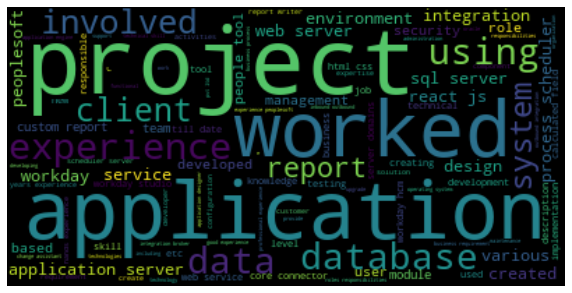

In [37]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Show Unique Categories**

In [38]:
categories = np.sort(data['Category'].unique())
categories

array(['PeopleSoft Resumes', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resumes', 'Workday Resumes'],
      dtype=object)

**Categories Labelled with Corresponding Resumes**

In [39]:
data_categories = [data[data['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]
data_categories

[                                              Resumes            Category
 22  murali professional summary years experience p...  PeopleSoft Resumes
 23  rahul ahuja summary years experience peoplesof...  PeopleSoft Resumes
 24  peoplesoft database administrator gangareddy p...  PeopleSoft Resumes
 25  r ahmed peoplesoft technical consultant profes...  PeopleSoft Resumes
 26  profile summary years experience implementing ...  PeopleSoft Resumes
 27  hari narayana professional summary years exper...  PeopleSoft Resumes
 28  classification internal classification interna...  PeopleSoft Resumes
 29  priyanka ramadoss mountpleasant coonoor nilgir...  PeopleSoft Resumes
 30  anubhav kumar singh core competencies scriptin...  PeopleSoft Resumes
 31  peoplesoft admin varkala vikas career objectiv...  PeopleSoft Resumes
 32  arun venu experience summary experience years ...  PeopleSoft Resumes
 33  tanna sujatha objective seeking challenging ro...  PeopleSoft Resumes
 34  c n c address manyat

**Bar Chart of Category Column**

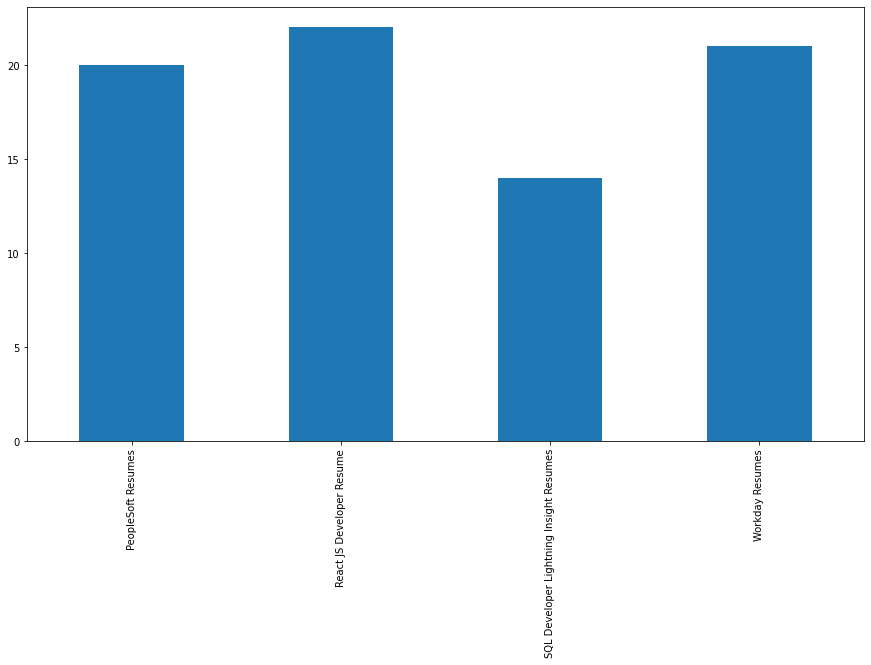

In [40]:
data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(15, 8))
plt.show()

**Pass Preprocessed Data for Wordcloud**

In [41]:
def wordcloud(data):
    txt = ' '.join(txt for txt in data['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [42]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

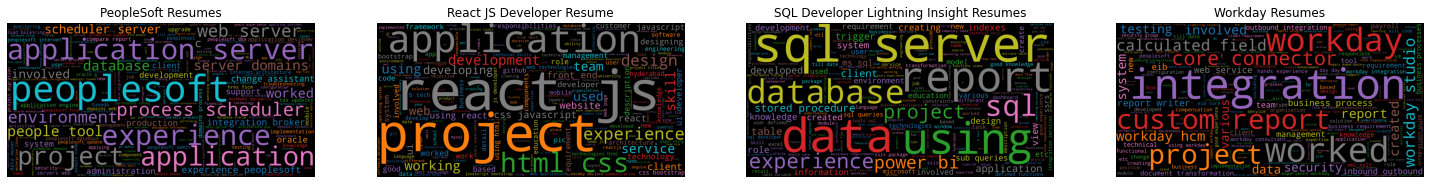

In [43]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

**Show Word - Frequency from Resumes Column**

In [44]:
def wordfreq(data):
    count = data['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(5)

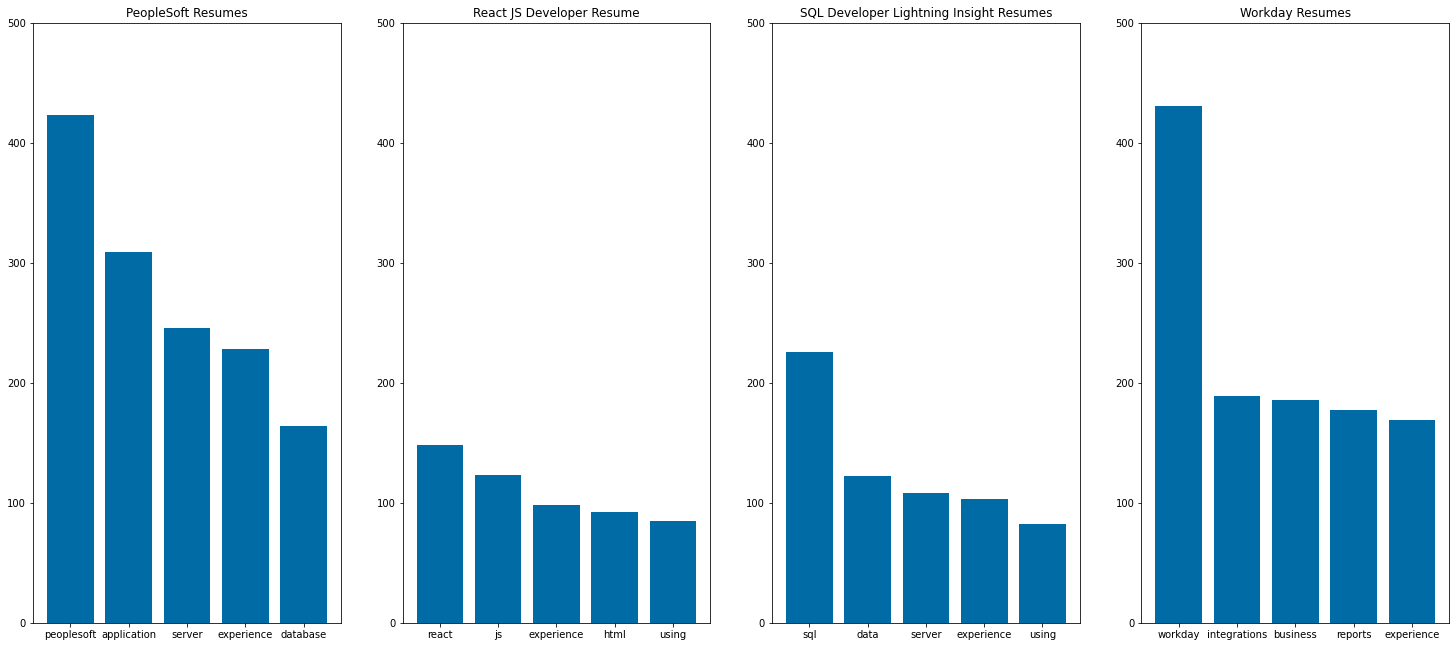

In [45]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(data_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

**Apply LabelEncoder to Category Column**

In [46]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:


data

,Resumes,Category
0,sarala madasu sarala madasu sri geethika prest...,1
1,md khizaruddin rauf experience currently worki...,1
2,venkatalakshmi pedireddy software developer ex...,1
3,naveen sadhu title software developer location...,1
4,ranga gaganam professional summary professiona...,1
...,...,...
72,jyoti verma professional summary professional ...,3
73,srikanth workday hcm consultant seeking suitab...,3
74,name gopi krishna reddy professional summery w...,3
75,venkateswarlu b workday consultant years exper...,3


In [48]:
data.Category.value_counts()

1    22
3    21
0    20
2    14
Name: Category, dtype: int64

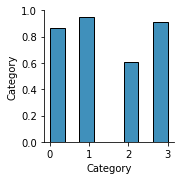

In [49]:
import seaborn as sns
sns.pairplot(data = data)

In [50]:
targetCounts = data['Category'].value_counts().reset_index()['Category']
targetLabels  = data['Category'].value_counts().reset_index()['index']

In [51]:
targetCounts

0    22
1    21
2    20
3    14
Name: Category, dtype: int64

In [52]:
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

**Pie Chart of Category Column**

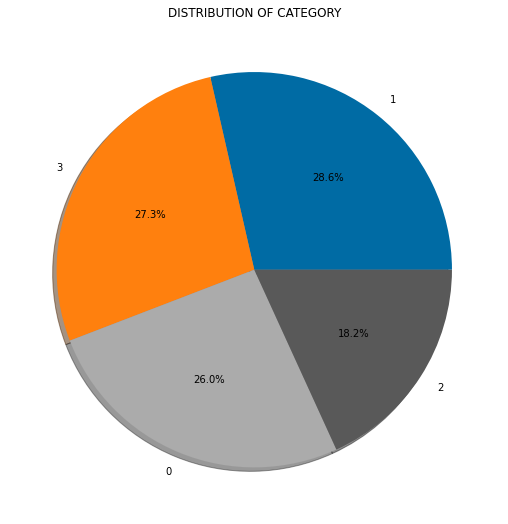

In [53]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title="DISTRIBUTION OF CATEGORY")
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

In [54]:
len(data['Resumes'])

77

In [55]:
same=0
diff=0
for i in range(0,1500):
    if(lem_words[i]==wordfreqdist[i]):
        same=same+1
    elif(lem_words[i]!=wordfreqdist[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 1500
Number of words not Lemmatized= 0


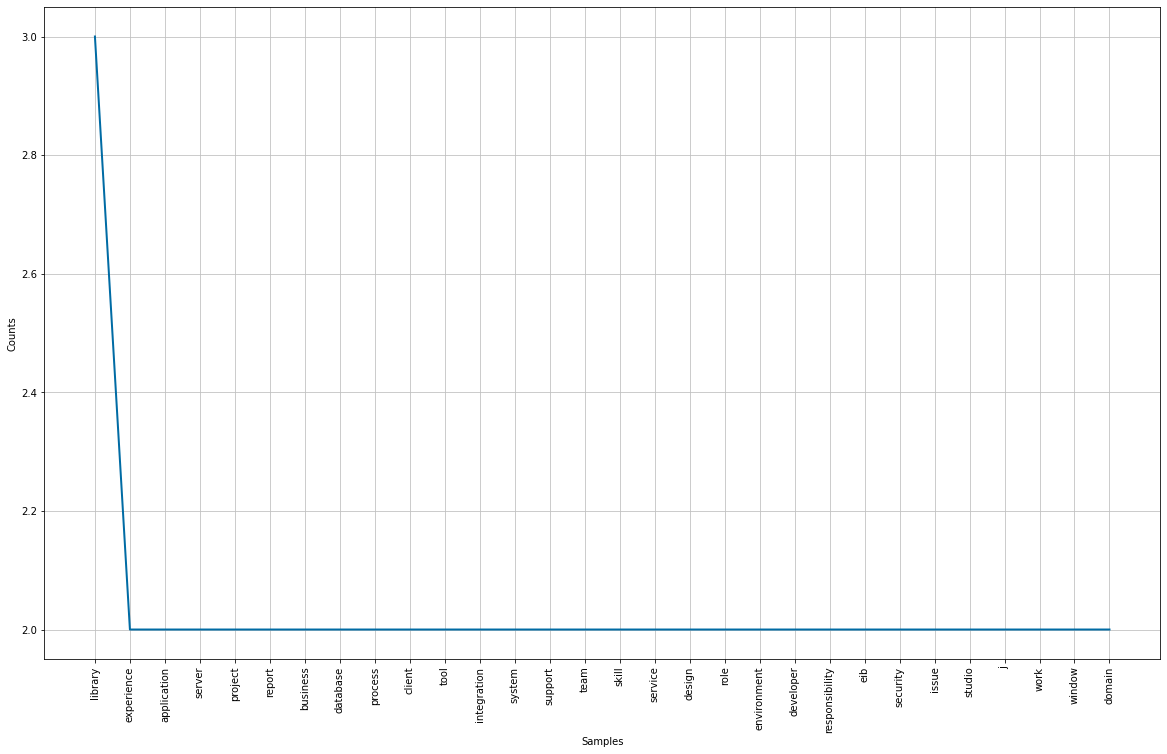

In [56]:
freq_dist = nltk.FreqDist(lem_words)
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [58]:
requiredText = data['Resumes'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed")

Feature completed


**Split Data into Train & Test**

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=42, test_size=0.30, shuffle = True, stratify=requiredTarget)
X_train.shape, X_test.shape

((53, 4382), (24, 4382))

**Import the Different Classifier Libraries**

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

**Implementing Classification Models**

**Random Forest Classifier**

In [62]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
prediction_1 = rf_clf.predict(X_test)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set    : {:.2f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set    : 1.00


In [63]:
print("\n Classification report for Random Forest Classifier %s:\n%s\n" % (rf_clf, metrics.classification_report(y_test, prediction_1)))


 Classification report for Random Forest Classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




In [64]:
accuracy_1 = round(accuracy_score(y_test,prediction_1),4)
precision_1 = round(precision_score(y_test,prediction_1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,prediction_1, average = 'macro'),4)
f1_score_1 = round(f1_score(y_test,prediction_1, average = 'macro'),4)

In [65]:
print('Accuracy   : ', accuracy_1)
print('Precision  : ', precision_1)
print('Recall     : ', recall_1)
print('f1-Score   : ', f1_score_1)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_1))

Accuracy   :  1.0
Precision  :  1.0
Recall     :  1.0
f1-Score   :  1.0
Confusion Matrix :
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]


**Support Vector Classifier**

In [66]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
prediction_2 = sv_clf.predict(X_test)
print('Accuracy of Support Vector Classifier on training set: {:.2f}'.format(sv_clf.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set    : {:.2f}'.format(sv_clf.score(X_test, y_test)))

Accuracy of Support Vector Classifier on training set: 1.00
Accuracy of Support Vector Classifier on test set    : 0.92


In [67]:
print("\n Classification report for Support Vector Classifier %s:\n%s\n" % (sv_clf, metrics.classification_report(y_test, prediction_2)))


 Classification report for Support Vector Classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.78      1.00      0.88         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.91        24
weighted avg       0.94      0.92      0.92        24




In [68]:
accuracy_2 = round(accuracy_score(y_test,prediction_2),4)
precision_2 = round(precision_score(y_test,prediction_2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,prediction_2, average = 'macro'),4)
f1_score_2 = round(f1_score(y_test,prediction_2, average = 'macro'),4)

In [69]:
print('Accuracy         : ', accuracy_2)
print('Precision        : ', precision_2)
print('Recall           : ', recall_2)
print('f1-Score         : ', f1_score_2)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_2))

Accuracy         :  0.9167
Precision        :  0.9444
Recall           :  0.8958
f1-Score         :  0.9103
Confusion Matrix :
 [[5 1 0 0]
 [0 7 0 0]
 [0 1 3 0]
 [0 0 0 7]]


**Naive Bayes_ MultinomialNB**

In [70]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
prediction_3 = nb_clf.predict(X_test)
print('Accuracy of Multinomial NB Classifier on training set: {:.2f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy of Multinomial NB Classifier on test set    : {:.2f}'.format(nb_clf.score(X_test, y_test)))

Accuracy of Multinomial NB Classifier on training set: 1.00
Accuracy of Multinomial NB Classifier on test set    : 0.92


In [71]:
print("\n Classification report for Multinomial NB Classifier %s:\n%s\n" % (nb_clf, metrics.classification_report(y_test, prediction_3)))


 Classification report for Multinomial NB Classifier MultinomialNB():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      1.00      0.93         7
           2       1.00      0.50      0.67         4
           3       0.88      1.00      0.93         7

    accuracy                           0.92        24
   macro avg       0.94      0.88      0.88        24
weighted avg       0.93      0.92      0.91        24




In [72]:
accuracy_3 = round(accuracy_score(y_test,prediction_3),4)
precision_3 = round(precision_score(y_test,prediction_3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,prediction_3, average = 'macro'),4)
f1_score_3 = round(f1_score(y_test,prediction_3, average = 'macro'),4)

In [73]:
print('Accuracy        : ', accuracy_3)
print('Precision       : ', precision_3)
print('Recall          : ', recall_3)
print('f1-Score        : ', f1_score_3)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_3))

Accuracy        :  0.9167
Precision       :  0.9375
Recall          :  0.875
f1-Score        :  0.8833
Confusion Matrix:
 [[6 0 0 0]
 [0 7 0 0]
 [0 1 2 1]
 [0 0 0 7]]


**Logistic Regression Classifier**

In [74]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
prediction_4 = logistic_clf.predict(X_test)
print('Accuracy of Logistic Regression Classifier on training set: {:.4f}'.format(logistic_clf.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set    : {:.4f}'.format(logistic_clf.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on training set: 1.0000
Accuracy of Logistic Regression Classifier on test set    : 0.9167


In [75]:
print("\n Classification report for Logistic Regression Classifier %s:\n%s\n" % (logistic_clf, metrics.classification_report(y_test, prediction_4)))


 Classification report for Logistic Regression Classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.78      1.00      0.88         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.91        24
weighted avg       0.94      0.92      0.92        24




In [76]:
accuracy_4 = round(accuracy_score(y_test,prediction_4),4)
precision_4 = round(precision_score(y_test,prediction_4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,prediction_4, average = 'macro'),4)
f1_score_4 = round(f1_score(y_test,prediction_4, average = 'macro'),4)

In [78]:
print('Accuracy        : ', accuracy_4)
print('Precision       : ', precision_4)
print('Recall          : ', recall_4)
print('f1-Score        : ', f1_score_4)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_4))

Accuracy        :  0.9167
Precision       :  0.9444
Recall          :  0.8958
f1-Score        :  0.9103
Confusion Matrix:
 [[5 1 0 0]
 [0 7 0 0]
 [0 1 3 0]
 [0 0 0 7]]


**AdaBoost Classifier**

In [79]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
prediction_5 = ab_clf.predict(X_test)
print('Accuracy of AdaBoost Classifier on training set: {:.4f}'.format(ab_clf.score(X_train, y_train)))
print('Accuracy of AdaBoost Classifier on test set    : {:.4f}'.format(ab_clf.score(X_test, y_test)))

Accuracy of AdaBoost Classifier on training set: 0.7358
Accuracy of AdaBoost Classifier on test set    : 0.6250


In [80]:
print("\n Classification report for AdaBoost Classifier %s:\n%s\n" % (ab_clf, metrics.classification_report(y_test, prediction_5)))


 Classification report for AdaBoost Classifier AdaBoostClassifier():
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         7
           2       1.00      0.75      0.86         4
           3       1.00      0.71      0.83         7

    accuracy                           0.62        24
   macro avg       0.62      0.62      0.59        24
weighted avg       0.60      0.62      0.58        24




In [81]:
accuracy_5 = round(accuracy_score(y_test,prediction_5),4)
precision_5 = round(precision_score(y_test,prediction_5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,prediction_5, average = 'macro'),4)
f1_score_5 = round(f1_score(y_test,prediction_5, average = 'macro'),4)

In [82]:
print('Accuracy        : ', accuracy_5)
print('Precision       : ', precision_5)
print('Recall          : ', recall_5)
print('f1-Score        : ', f1_score_5)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_5))

Accuracy        :  0.625
Precision       :  0.625
Recall          :  0.6161
f1-Score        :  0.5893
Confusion Matrix:
 [[0 6 0 0]
 [0 7 0 0]
 [0 1 3 0]
 [2 0 0 5]]


**Gradient Boosting Classifier**

In [83]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
prediction_6 = gb_clf.predict(X_test)
print('Accuracy of GradientBoosting Classifier on training set: {:.4f}'.format(gb_clf.score(X_train, y_train)))
print('Accuracy of GradientBoosting Classifier on test set    : {:.4f}'.format(gb_clf.score(X_test, y_test)))

Accuracy of GradientBoosting Classifier on training set: 1.0000
Accuracy of GradientBoosting Classifier on test set    : 0.9583


In [84]:
print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (gb_clf, metrics.classification_report(y_test, prediction_6)))


 Classification report for GradientBoosting Classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24




In [85]:
accuracy_6 = round(accuracy_score(y_test,prediction_6),4)
precision_6 = round(precision_score(y_test,prediction_6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,prediction_6, average = 'macro'),4)
f1_score_6 = round(f1_score(y_test,prediction_6, average = 'macro'),4)

In [86]:
print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_score_6)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_6))

Accuracy Score  :  0.9583
Precision Score :  0.9643
Recall Score    :  0.9643
f1-Score        :  0.9615
Confusion Matrix:
 [[6 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [1 0 0 6]]


In [87]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

**Xtreme Gradient Boosting Classifier**

In [88]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
prediction_7 = xgb_clf.predict(X_test)
print('Accuracy of XtremeGradientBoosting Classifier on training set: {:.4f}'.format(xgb_clf.score(X_train, y_train)))
print('Accuracy of XtremeGradientBoosting Classifier on test set    : {:.4f}'.format(xgb_clf.score(X_test, y_test)))

Accuracy of XtremeGradientBoosting Classifier on training set: 1.0000
Accuracy of XtremeGradientBoosting Classifier on test set    : 0.7500


In [89]:
print("\n Classification report for Xtreme GradientBoosting Classifier %s:\n%s\n" % (xgb_clf, metrics.classification_report(y_test, prediction_7)))


 Classification report for Xtreme GradientBoosting Classifier XGBClassifier(objective='multi:softprob'):
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.88      1.00      0.93         7
           2       1.00      0.25      0.40         4
           3       0.62      0.71      0.67         7

    accuracy                           0.75        24
   macro avg       0.80      0.70      0.69        24
weighted avg       0.78      0.75      0.73        24




In [90]:
accuracy_7 = round(accuracy_score(y_test,prediction_7),4)
precision_7 = round(precision_score(y_test,prediction_7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,prediction_7, average = 'macro'),4)
f1_score_7 = round(f1_score(y_test,prediction_7, average = 'macro'),4)

In [91]:
print('Accuracy        : ', accuracy_7)
print('Precision       : ', precision_7)
print('Recall          : ', recall_7)
print('f1-Score        : ', f1_score_7)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_7))

Accuracy        :  0.75
Precision       :  0.8036
Recall          :  0.6994
f1-Score        :  0.6923
Confusion Matrix:
 [[5 0 0 1]
 [0 7 0 0]
 [0 1 1 2]
 [2 0 0 5]]


**Light Gradient Boosting Classifier**

In [92]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
prediction_8 = lgb_clf.predict(X_test)
print('Accuracy of LightGradientBoosting Classifier on training set: {:.4f}'.format(lgb_clf.score(X_train, y_train)))
print('Accuracy of LightGradientBoosting Classifier on test set    : {:.4f}'.format(lgb_clf.score(X_test, y_test)))

Accuracy of LightGradientBoosting Classifier on training set: 1.0000
Accuracy of LightGradientBoosting Classifier on test set    : 0.8333


In [93]:
print("\n Classification report for Light Gradient Boosting Classifier %s:\n%s\n" % (lgb_clf, metrics.classification_report(y_test, prediction_8)))


 Classification report for Light Gradient Boosting Classifier LGBMClassifier():
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.70      1.00      0.82         7
           2       0.50      0.25      0.33         4
           3       1.00      1.00      1.00         7

    accuracy                           0.83        24
   macro avg       0.80      0.77      0.77        24
weighted avg       0.83      0.83      0.81        24




In [94]:
accuracy_8 = round(accuracy_score(y_test,prediction_8),4)
precision_8 = round(precision_score(y_test,prediction_8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,prediction_8, average = 'macro'),4)
f1_score_8 = round(f1_score(y_test,prediction_8, average = 'macro'),4)

In [95]:
print('Accuracy        : ', accuracy_8)
print('Precision       : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_score_8)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_8))

Accuracy        :  0.8333
Precision       :  0.8
Recall Score    :  0.7708
f1-Score        :  0.7665
Confusion Matrix:
 [[5 0 1 0]
 [0 7 0 0]
 [0 3 1 0]
 [0 0 0 7]]


**Show Matrix**

In [99]:
Final_Table = {'Classifier' : ['Random Forest Classifier', 'SVM Classifier', 'Multinomial NB Classifier', 'Logistic Regression', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'],
               'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8], 
         'Precision' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8],
         'Recall' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8], 
         'F1-Score' : [f1_score_1, f1_score_2, f1_score_3, f1_score_4, f1_score_5, f1_score_6, f1_score_7, f1_score_8]}
Final_Table = pd.DataFrame(Final_Table)
Final_Table

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000
1,SVM Classifier,0.9167,0.9444,0.8958,0.9103
2,Multinomial NB Classifier,0.9167,0.9375,0.8750,0.8833
3,Logistic Regression,0.9167,0.9444,0.8958,0.9103
4,AdaBoost Classifier,0.6250,0.6250,0.6161,0.5893
5,Gradient Boosting Classifier,0.9583,0.9643,0.9643,0.9615
6,Xtreme Gradient Boosting Classifier,0.7500,0.8036,0.6994,0.6923
7,Light Gradient Boosting Classifier,0.8333,0.8000,0.7708,0.7665


**Conclusion :**
From the final table we can conclude that among the calculated classifiers  Random Forest Classifier gave the favourable results i.e Precision & Recall is 1.0 and that too F1-score is also 1.0. which is harmonic mean of precision and recall.